<a href="https://colab.research.google.com/github/SenanurSelcuk00/Dollar-forecast/blob/main/Dolar_tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# burada kullanacağımız modelleri import ettik
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#veri yukleme
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
veriler = pd.read_csv('/content/drive/MyDrive/usdtry (1).csv')

#data frame dilimleme (veriyi x ve y şeklinde bölmek için kullanılıyor)

x = veriler.iloc[:,0:1]
y = veriler.iloc[:,1:]

#numpy array donusumu(burada verileri .values metodu kullanarak bir dizi içine atıyoruz)

X = x.values
Y = y.values

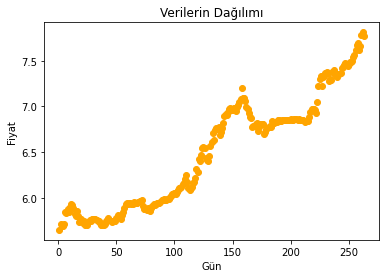

In [23]:
#verilerin dagilimi 

plt.scatter(X,Y,color="orange")
plt.xlabel("Gün") 
plt.ylabel("Fiyat")
plt.title("Verilerin Dağılımı")
plt.show()



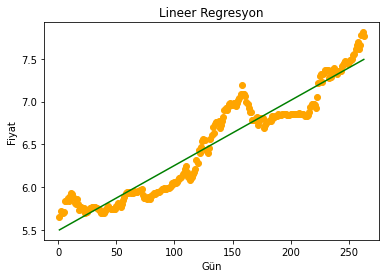

Lineer Regresyon Tahmin: [[7.77495742]]


In [24]:
#lineer regresyon (lineer regresyon yaparak verinin bunun için uygun olup olmadığını kontrol ettik)

linreg = LinearRegression()
linreg.fit(X,Y)

#lineer regresyon gorsellestirme 

plt.scatter(X,Y,color="orange")
plt.plot(x,linreg.predict(X), color ="green")
plt.xlabel("Gün") 
plt.ylabel("Fiyat")
plt.title("Lineer Regresyon")
plt.show()
# verimiz lineer regresyon için uygun değil çünkü çektiğimiz çizginin dışında çok fazla veri kaldı
#lineer tahmin

print("Lineer Regresyon Tahmin:",linreg.predict([[300]]))




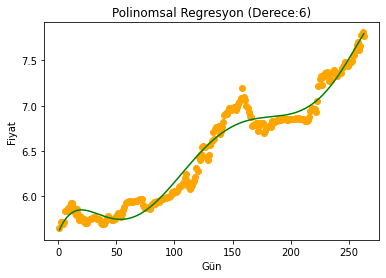

Polinomsal Regresyon Tahmin: [[7.73054879]]


In [25]:
#polinomsal regresyon

polreg = PolynomialFeatures(degree=6)
xpol = polreg.fit_transform(X)
linreg = LinearRegression()
linreg.fit(xpol,y)

#polinomsal regresyon gorsellestirme

plt.scatter(X,Y,color ="orange")
plt.plot(X,linreg.predict(polreg.fit_transform(X)), color = "green")
plt.xlabel("Gün") 
plt.ylabel("Fiyat")
plt.title("Polinomsal Regresyon (Derece:6)")
plt.show()

#polinomsal tahmini veri için daha uygun grafik gerçek değerlerin üstünden daha fazla geçiyor

print("Polinomsal Regresyon Tahmin:",linreg.predict(polreg.fit_transform([[300]])))

